In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.exceptions import NotFittedError
from scipy.stats import multivariate_normal

# Часть I: О теореме Байеса

##  Задание 1 
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Ответ

Введем обозначения:

$A$ - подсудимый виновен;\
$B$ - подсудимый имеет редкую группу крови.

Прокурор оценил $P(B)$, а должен был $P(A|B)$.

## Задание 2

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

### Ответ

Адковат оценил $P(A)$, не использовав знание о том, что у убийцы редкая группа крови и $B$. Должен был оценить $P(A|B)$.

## Задание 3

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


### Ответ


$P(disease = 1|test = 1) = \frac{P(test = 1|disease = 1)P(disease = 1)}{P(test = 1)} = \frac{P(test = 1|disease = 1)P(disease = 1)}{P(test = 1|disease = 0) P(disease = 0) + P(test = 1|disease = 1) P(disease = 1)} = \frac{(1 - P(FN))P(disease = 1)}{P(FP) P(disease = 0) + (1 - P(FN)) P(disease = 1)} = \frac{(1 - P(FN)) * 0.01}{P(FP) * 0.99 + (1 - P(FN)) *0.01} = \frac{(1 - FNR) * 0.01}{FPR * 0.99 + (1 - FNR) * 0.01}$


$P(disease = 1|test = 0) = \frac{P(test = 0|disease = 1)P(disease = 1)}{P(test = 0)} = \frac{P(test = 0|disease = 1)P(disease = 1)}{P(test = 0|disease = 0) P(disease = 0) + P(test = 0|disease = 1) P(disease = 1)} = \frac{P(FN)P(disease = 1)}{(1 - P(FP)) P(disease = 0) + P(FN) P(disease = 1)} = \frac{P(FN) * 0.01}{(1 - P(FP)) * 0.99 + P(FN) * 0.01} = \frac{FNR * 0.01}{(1 - FPR) * 0.99 + FNR * 0.01}$

In [2]:
def p_disease_positive(fnr=0.05, fpr=0.05):
    return (1 - fnr) * 0.01 / (0.99 * fpr + 0.01 * (1 - fnr))


def p_disease_negative(fnr=0.05, fpr=0.05):
    return 0.01 * fnr / (0.99 * (1 - fpr) + 0.01 * fnr)

In [3]:
p_disease_positive()

0.16101694915254236

In [4]:
p_disease_negative()

0.0005313496280552604

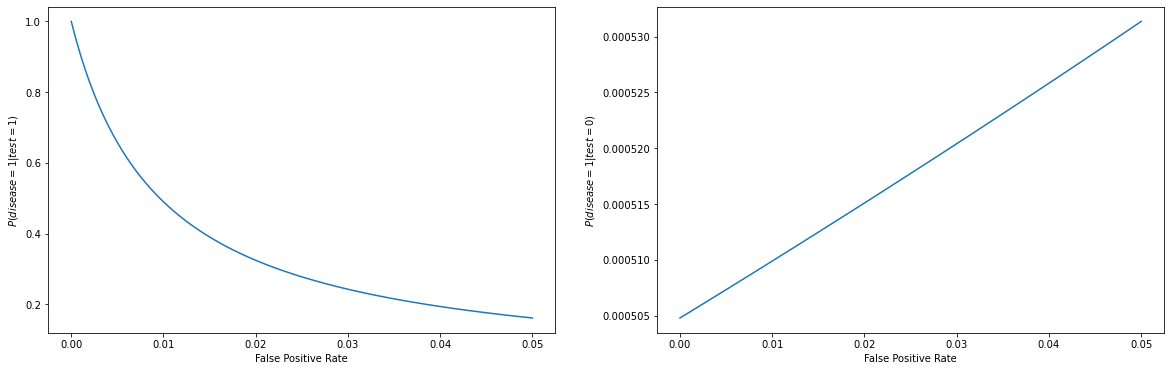

In [5]:
fnr_space = fpr_space = np.linspace(0, 0.05, 100)

# Фиксируем fnr, смотрим на апостериорные вероятности болезни при положительном и отрицательном тестах

f = plt.figure(figsize=(20, 6))

ax1 = f.add_subplot(121)
ax1.plot(fpr_space, p_disease_positive(fpr=fpr_space))
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("$P(disease = 1|test = 1)$")

ax2 = f.add_subplot(122)
ax2.plot(fpr_space, p_disease_negative(fpr=fpr_space))
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("$P(disease = 1|test = 0)$")

plt.show()

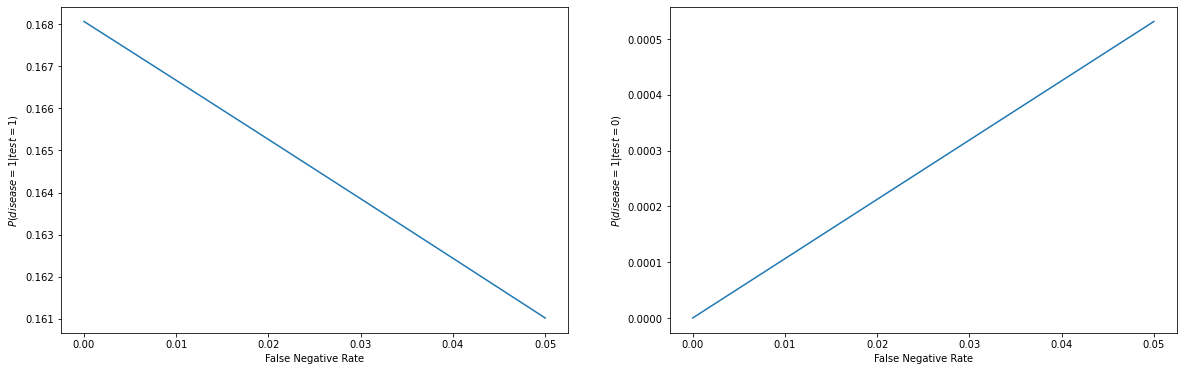

In [6]:
# Фиксируем fpr, смотрим на апостериорные вероятности болезни при положительном и отрицательном тестах

f = plt.figure(figsize=(20, 6))

ax1 = f.add_subplot(121)
ax1.plot(fpr_space, p_disease_positive(fnr=fnr_space))
ax1.set_xlabel("False Negative Rate")
ax1.set_ylabel("$P(disease = 1|test = 1)$")

ax2 = f.add_subplot(122)
ax2.plot(fpr_space, p_disease_negative(fnr=fnr_space))
ax2.set_xlabel("False Negative Rate")
ax2.set_ylabel("$P(disease = 1|test = 0)$")

plt.show()

При умеренной смертности болезни можно обратиться к уменьшению $FPR$. Это даст значительный прирост к уверенности, что человек болен при положительном тесте. А значит, врачам не придется лечить или тратить время на дополнительную диагностику здоровых людей, и они смогут сконцентрироваться на по-настоящему больных людях.

# Часть II: О линейной регрессии

## Задание 1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [7]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [8]:
df_ru = df \
.loc[(df["location"] == "Russia") & (df["date"] >= "2020-03-03")] \
.replace({"new_cases": 0}, 1) \
.filter(items=["date", "new_cases"]) \
.reset_index(drop=True)

df_ru["total_cases"] = df_ru["new_cases"].cumsum()
df_ru["day"] = df_ru.index + 1
df_ru["day_2"] = (df_ru["day"]) ** 2
df_ru.set_index("date", inplace=True)
df_ru.index = pd.DatetimeIndex(df_ru.index, freq="d")

In [9]:
df_ru.head()

,new_cases,total_cases,day,day_2
date,,,,
2020-03-03,1.0,1.0,1,1
2020-03-04,1.0,2.0,2,4
2020-03-05,1.0,3.0,3,9
2020-03-06,9.0,12.0,4,16
2020-03-07,1.0,13.0,5,25


In [10]:
train_size = 50

Xy_train = df_ru.head(train_size)
Xy_test = df_ru.tail(-train_size)

## Задание 2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

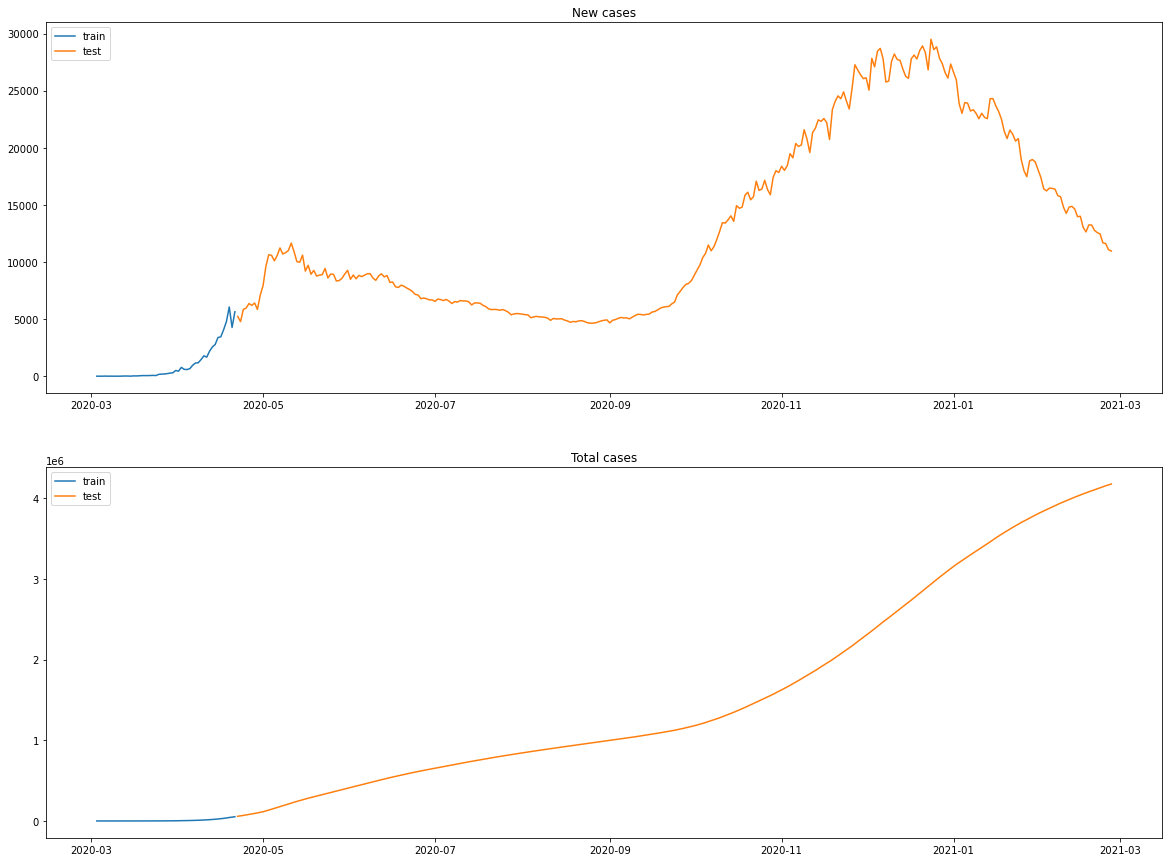

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15))

axes[0].plot(Xy_train["new_cases"], label="train")
axes[0].plot(Xy_test["new_cases"], label="test")
axes[0].legend(loc="upper left")
axes[0].set_title("New cases")

axes[1].plot(Xy_train["total_cases"], label="train")
axes[1].plot(Xy_test["total_cases"], label="test")
axes[1].legend(loc="upper left")
axes[1].set_title("Total cases")

plt.show()

## Задание 2а.

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.


In [12]:
lr = LinearRegression()

lr.fit(Xy_train[["day"]], np.log(Xy_train["new_cases"]))

print("ln y ~ ax + b")
print("a:", lr.coef_[0])
print("b:", lr.intercept_)

ln y ~ ax + b
a: 0.1859630916851052
b: 0.13472442721454225


In [13]:
class BayesianLinearRegression:
    def __init__(self, mu0, sigma0):
        self.mu0 = mu0
        self.sigma0 = sigma0
        self.mu = mu0
        self.sigma = sigma0
        self.is_fitted = False
    
    def __repr__(self):
        return f"{self.__class__.__name__}(mu0 = {self.mu0}, sigma0 = {self.sigma0})"
    
    @staticmethod
    def add_ones(X):
        return np.hstack((X, np.ones((len(X), 1))))
    
    @staticmethod
    def estimate_noise(X, y):
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        noise = np.var(y - X @ w)
        return noise
    
    def bayesian_update(self, X, y, noise):
        sigma = np.linalg.inv(self.sigma0) + X.T @ X / noise
        self.sigma = np.linalg.inv(sigma)
        
        mu = np.linalg.inv(self.sigma0) @ self.mu0 + X.T @ y / noise
        self.mu = self.sigma @ mu
    
    def fit(self, X, y):
        X = self.add_ones(X)
        noise = self.estimate_noise(X, y)
        self.bayesian_update(X, y, noise)
        self.is_fitted = True
        return self
    
    def predict(self, X):
        if not self.is_fitted:
            raise NotFittedError
        X = self.add_ones(X)
        return X @ self.mu
    
    def sample_predict(self, X, n):
        if not self.is_fitted:
            raise NotFittedError
        X = self.add_ones(X)
        w_sample = np.random.multivariate_normal(self.mu, self.sigma, n)
        res = []
        for w in w_sample:
            res.append(X @ w)
        return np.array(res)

In [14]:
mu0 = np.zeros((2,))
sigma0 = np.eye(2)

blr = BayesianLinearRegression(mu0, sigma0)
blr.fit(Xy_train[["day"]], np.log(Xy_train["new_cases"]))

BayesianLinearRegression(mu0 = [0. 0.], sigma0 = [[1. 0.]
 [0. 1.]])

In [15]:
print("ln y ~ ax + b")
print("a:", blr.mu[0])
print("b:", blr.mu[1])

ln y ~ ax + b
a: 0.18607077245344583
b: 0.13104732163793287


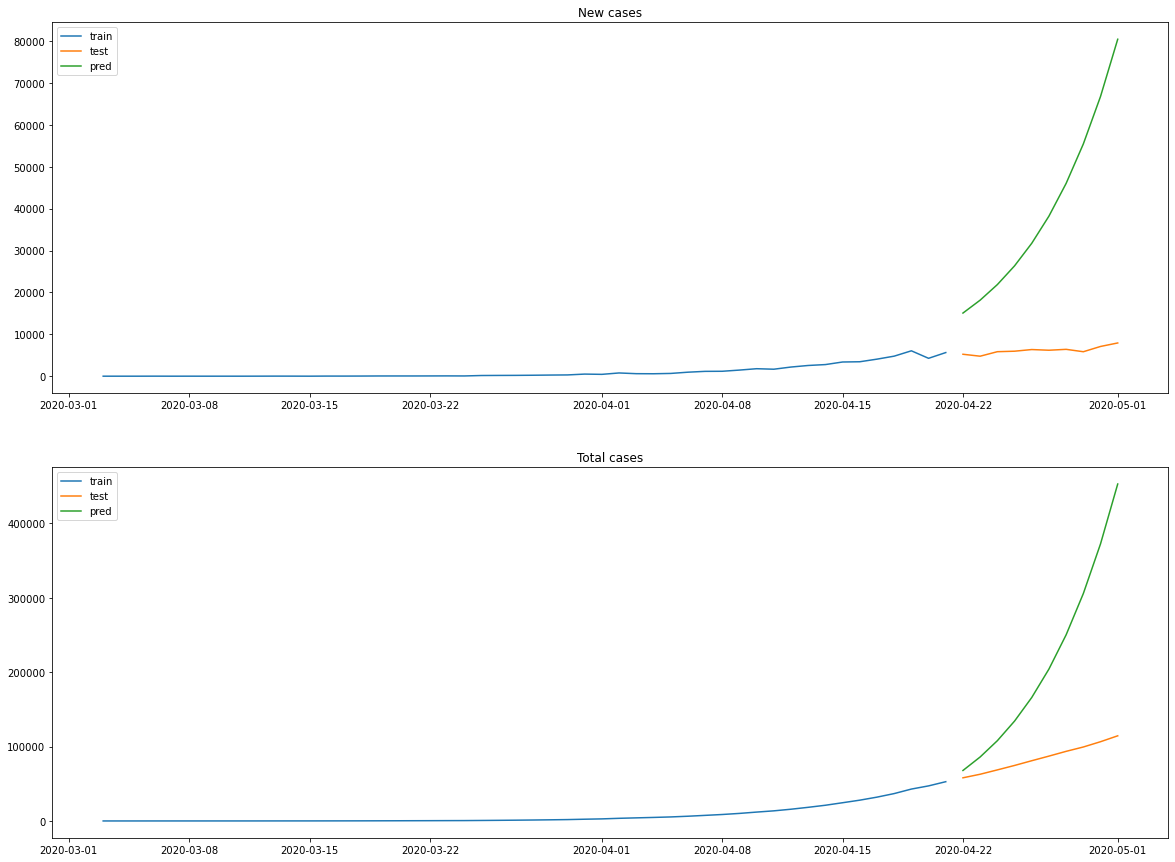

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15))

forecast_period = 10

blr_pred = Xy_test[["day"]].copy()
blr_pred["new_cases"] = np.exp(blr.predict(Xy_test[["day"]]))
blr_pred["total_cases"] = np.cumsum(blr_pred["new_cases"]) + Xy_train["total_cases"][-1]

axes[0].plot(Xy_train["new_cases"], label="train")
axes[0].plot(Xy_test.iloc[:forecast_period].loc[:, "new_cases"], label="test")
axes[0].plot(blr_pred.iloc[:forecast_period].loc[:, "new_cases"], label="pred")
axes[0].legend(loc="upper left")
axes[0].set_title("New cases")

axes[1].plot(Xy_train["total_cases"], label="train")
axes[1].plot(Xy_test.iloc[:forecast_period].loc[:, "total_cases"], label="test")
axes[1].plot(blr_pred.iloc[:forecast_period].loc[:, "total_cases"], label="pred")
axes[1].legend(loc="upper left")
axes[1].set_title("Total cases")

plt.show()

## Задание 2b.

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).


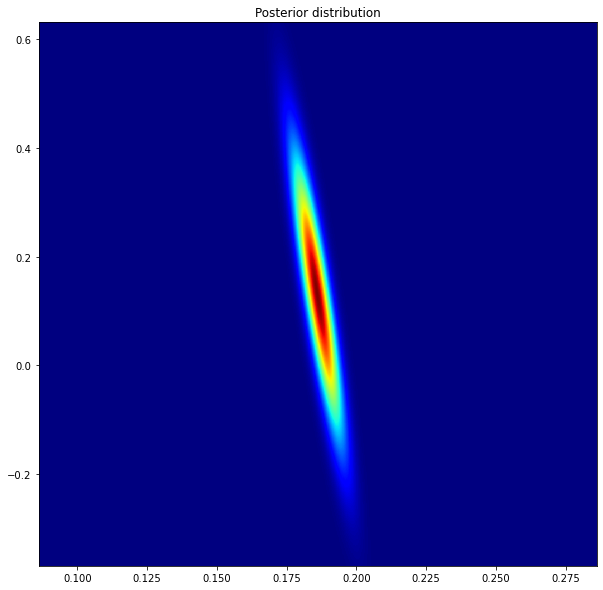

In [17]:
space_size = 1000

x_lim = (blr.mu[0] - .1, blr.mu[0] + .1)
y_lim = (blr.mu[1] - .5, blr.mu[1] + .5)

X = np.linspace(*x_lim, space_size)
Y = np.linspace(*y_lim, space_size)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


Z = multivariate_normal.pdf(pos, mean=blr.mu, cov=blr.sigma)

plt.figure(figsize=(10, 10))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
plt.title("Posterior distribution")
plt.show()

## Задание 2c.

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

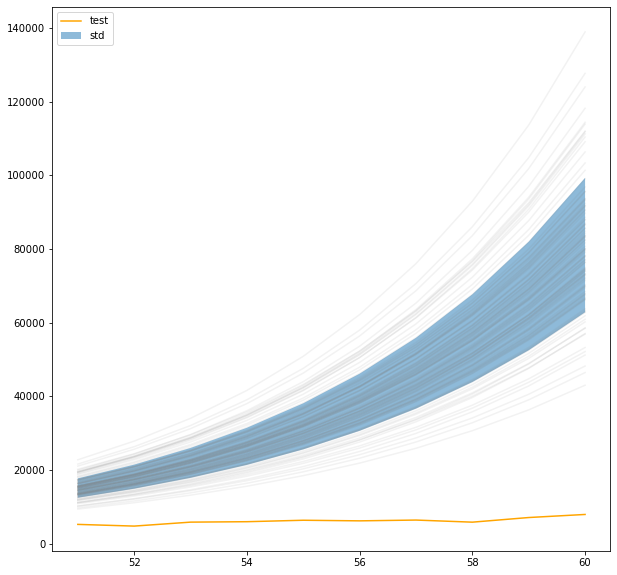

In [34]:
forecast_data = Xy_test.iloc[:forecast_period][["day"]]
sample_pred = np.exp(blr.sample_predict(Xy_test.iloc[:forecast_period][["day"]], 100))


plt.figure(figsize=(10, 10))
for pred in sample_pred:
    plt.plot(Xy_test.iloc[:forecast_period][["day"]], pred, alpha=.1, color="grey")
plt.plot(
    Xy_test.iloc[:forecast_period][["day"]], Xy_test.iloc[:forecast_period]["new_cases"].values, 
    label="test", color="orange"
)

lb = np.mean(sample_pred, axis=0) - np.std(sample_pred, axis=0) 
ub = np.mean(sample_pred, axis=0) + np.std(sample_pred, axis=0)
plt.fill_between(Xy_test["day"].iloc[:forecast_period], lb, ub, alpha=.5, label="std")

plt.legend()
plt.show()